  ## Image Analysis 


## Part 2: Processing an image of coins

In [13]:
# Importing packages for this assigment/
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
import scipy.ndimage.filters
from skimage import io 
from scipy import signal
from skimage.morphology import square, rectangle, diamond, disk, star, octagon,binary_dilation, erosion, binary_opening,opening,  binary_closing, closing
from skimage.filters import median, gaussian
from skimage import img_as_ubyte
from skimage.filters import unsharp_mask, threshold_local
from scipy.ndimage import binary_fill_holes
from skimage.morphology import remove_small_objects
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks, probabilistic_hough_line
from skimage.draw import circle_perimeter,  set_color
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import measure
from skimage import draw 
from skimage.segmentation import watershed
%matplotlib inline

(400, 300, 3)


Text(0.5, 1.0, 'Noisy coins image')

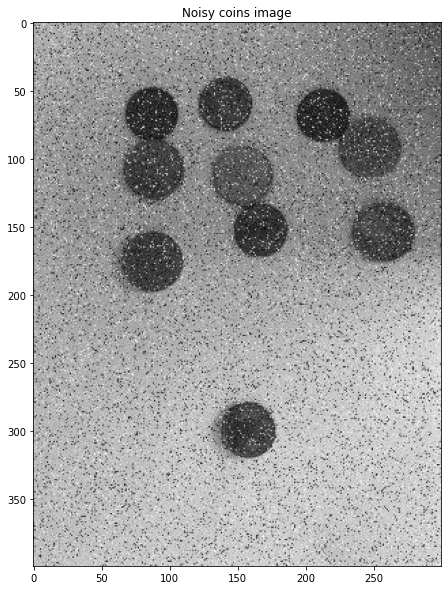

In [14]:

# 1.
# loading the image 
im = io.imread("  ")
print(im.shape)
# change color image to gray image
im2 = color.rgb2gray(im)
# display the image with a gray color map
plt.figure(figsize= (15, 10))
plt.imshow(im2, cmap='gray');plt.title('Noisy coins image')



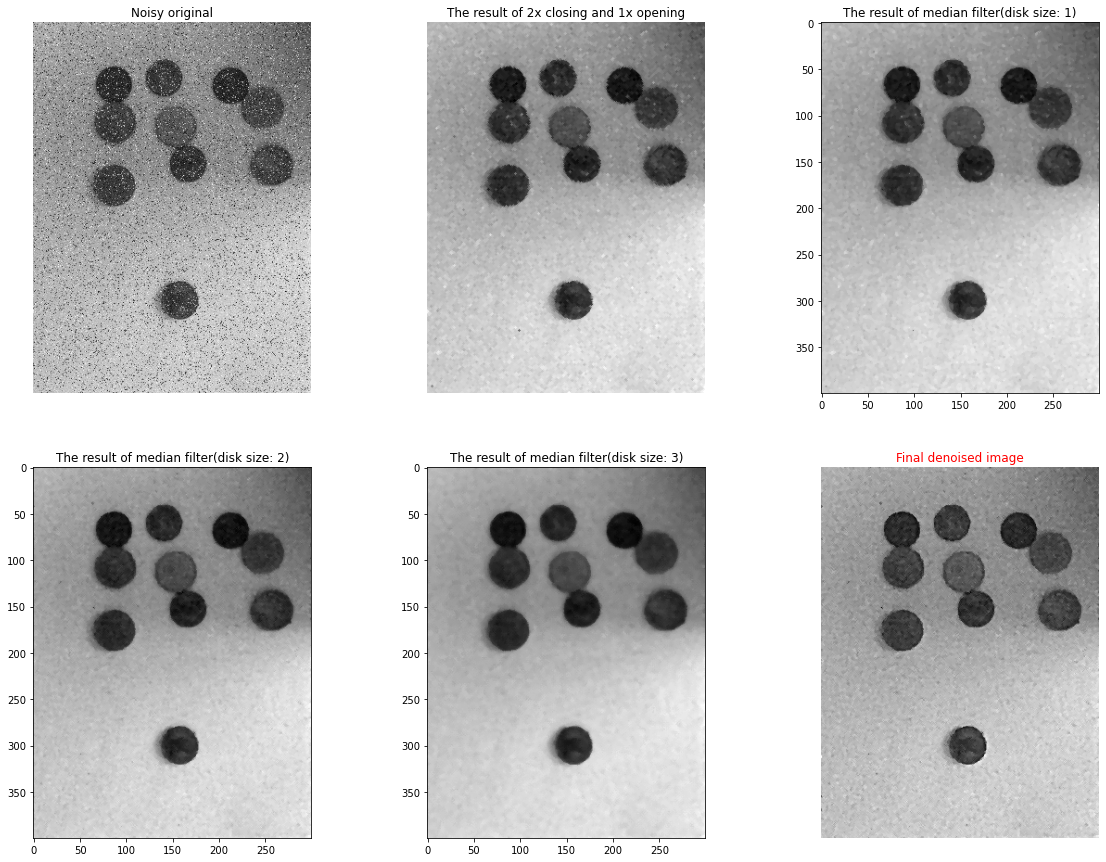

In [15]:
#Your code and comments go here 

# step 1. remove salt&peper noise using opening and closing 
struct_elem = disk(1)
im_close= closing (im2, struct_elem) # first closing 
im_close2 = closing(im_close, struct_elem) # second closing 
close_open = opening( im_close2, struct_elem)# opening after second closing 

# step2. remove salt&peper using median filter 

noisy_image = img_as_ubyte(im2)
median_1= median(close_open, disk(1))
median_2= median(im2, disk(2))
median_3= median(im2, disk(3))

# step3. image enhancement using unsharp_mask
#source: https://scikit-image.org/docs/stable/auto_examples/filters/plot_unsharp_mask.html#sphx-glr-auto-examples-filters-plot-unsharp-mask-py

denoised_im = unsharp_mask(median_2, radius=2, amount=1) # take median_2 as input


plt.figure(figsize= (20,15))
plt.subplot(231), plt.imshow(im2,cmap='gray' ), plt.title('Noisy original'), plt.axis('off')
plt.subplot(232), plt.imshow(close_open,cmap='gray'), plt.axis('off'), plt.title('The result of 2x closing and 1x opening')
plt.subplot(233), plt.imshow( median_1, cmap='gray'),plt.title('The result of median filter(disk size: 1)')
plt.subplot(234), plt.imshow( median_2, cmap='gray'),plt.title('The result of median filter(disk size: 2)')
plt.subplot(235), plt.imshow( median_3, cmap='gray'),plt.title('The result of median filter(disk size: 3)')
plt.subplot(236), plt.imshow( denoised_im, cmap='gray'),plt.title('Final denoised image', color= 'red')
plt.axis('off')
plt.show()


<span style='color:blue'>   

After the visual inspection, I decided to use th result of median filter with disk size 2, because it looks cleaner and less blur. To remove the blur I've used unsharp_mask to remove the blur.
<span>

************************************************** method 1: Segmentation with Intensity thresholding ******************************


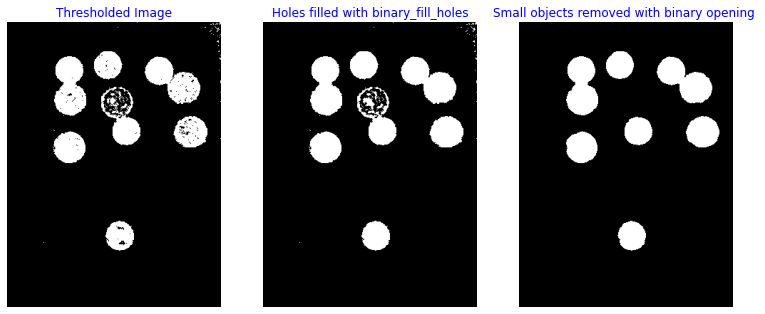

In [16]:
#Your code and comments go here 

# method 1: Intensity thresholding 
from skimage.filters import try_all_threshold, threshold_minimum
im3 = denoised_im # from the task2 

# normarlize the intensity values a range between 0 and 1
im3 = im3-im3.min()                    
im3 = im3/im3.max()

# intensity thresholding 
threshold_im = im3< 0.33

# fill the holes
filled_im = binary_fill_holes(threshold_im) #

# remove the small noises with binary_opening
threshold_1 = binary_opening(filled_im, disk(5))

print("*"*50, "method 1: Segmentation with Intensity thresholding", "*"*30)

plt.figure(figsize=(13, 8))
plt.subplot(131),plt.imshow(threshold_im, cmap='gray' ),plt.title("Thresholded Image", color='b'),plt.axis('off')
plt.subplot(132),plt.imshow(filled_im, cmap='gray' ),plt.title("Holes filled with binary_fill_holes", color='b'),plt.axis('off')
plt.subplot(133),plt.imshow(threshold_1, cmap='gray' ),plt.title("Small objects removed with binary opening ", color='b'),plt.axis('off')
plt.show()



************************************************************  Which threshold is the best from try_all_threshold algorithm?  ******************************


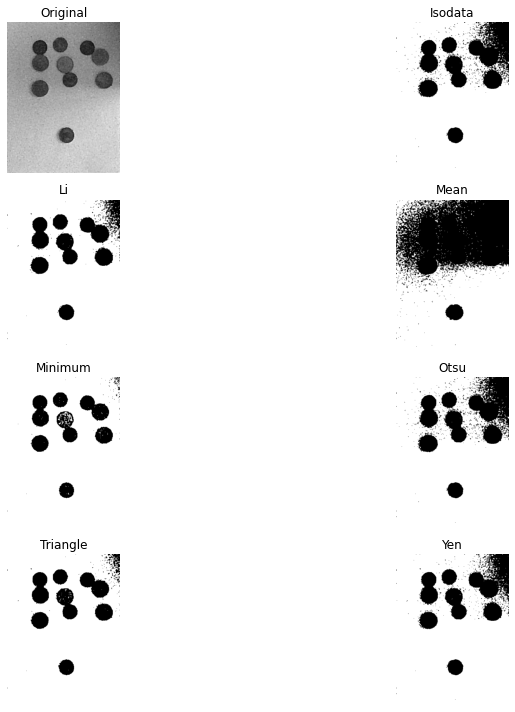

************************************************************ Minimum thresholding is selected for the segmentation ******************************


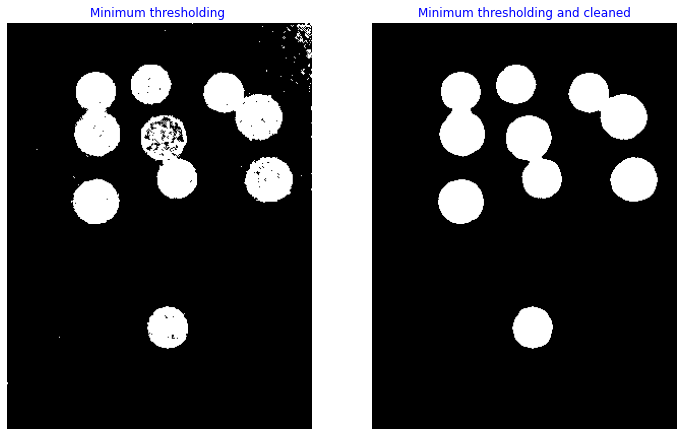

In [17]:
# & method-2 minimum thresholding (try try_all_threshold)
fig, ax = try_all_threshold(denoised_im, figsize=(15, 10), verbose=False)
print("*"*60," Which threshold is the best from try_all_threshold algorithm? ", "*"*30)
plt.show()
# threshold_minimum showed best result, so use threshold_minimum
thresh_min = im3 < threshold_minimum(im3)

# clean the image again to remove last noises
hole_filled = binary_fill_holes(thresh_min) #
clean_im = binary_opening(hole_filled, disk(10))


# show the result 
plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(thresh_min, cmap='gray' ),plt.title("Minimum thresholding ", color='b'),plt.axis('off')
plt.subplot(122), plt.imshow(clean_im, cmap='gray' ), plt.title("Minimum thresholding and cleaned", color='b'),plt.axis('off')
plt.axis('off')
print("*"*60,"Minimum thresholding is selected for the segmentation", "*"*30)

plt.show()

In [ ]:

# method 3. local thresholding with clean_im image 

local_thresh = threshold_local(clean_im)
binary_local = clean_im  > threshold_local(clean_im, block_size =99)
local_thresh_im = binary_opening(binary_local, disk(4))
plt.figure(figsize= (10, 10))
plt.imshow(local_thresh_im, cmap ='gray'), plt.title('segmentation with local thresholding')
plt.show()


(<AxesSubplot:title={'center':'Connected components in the same color'}>,
 Text(0.5, 1.0, 'Connected components in the same color'))

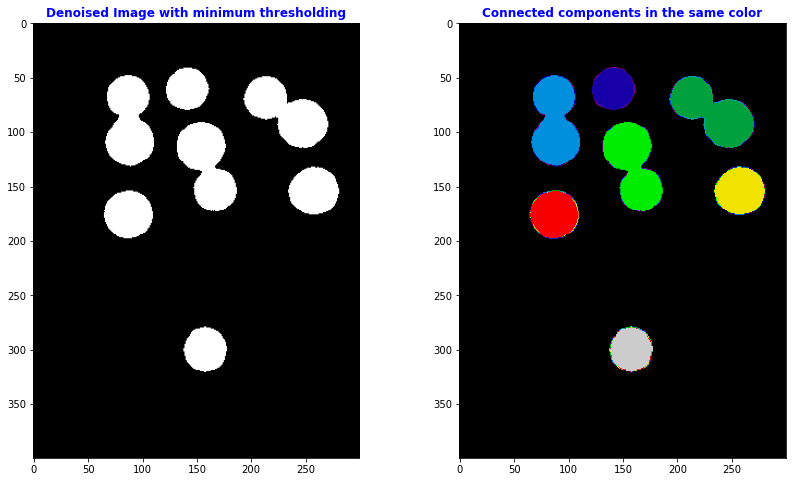

In [19]:
#Your code and comments go here 
#4.i connect all the connected components and visualize each connected component with a different color overlaid on the denoised image. 

# label all components with background 0
labels = measure.label(clean_im) # clean_im is result of minimum thresholding from task_3. 

plt.figure(figsize=(14,8))
plt.subplot(121),plt.imshow(clean_im, cmap=plt.cm.gray), plt.title ("Denoised Image with minimum thresholding", fontweight="bold", color ='b')
plt.subplot(122),plt.imshow(labels, cmap=plt.cm.nipy_spectral ), plt.title ("Connected components in the same color", fontweight="bold", color ='b')


Text(0.5, 1.0, 'Separate the touching coins')

<Figure size 432x288 with 0 Axes>

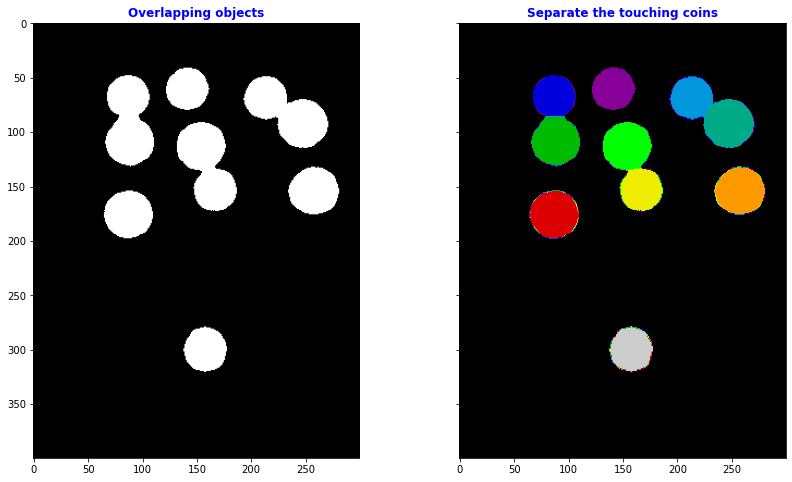

In [20]:
# 4.(ii) separate the touching coins (visualize each coin with a different color overlaid on the denoised image).

#Exact Euclidean distance transform.

distance = ndi.distance_transform_edt(clean_im) # clean_im is the result of minimum thresholding from task-3

# finding the coordinates of local peaks  
local_maxi = peak_local_max(distance, footprint=np.ones((5, 5)), labels=clean_im)

mask = np.zeros(distance.shape, dtype=bool)
mask[tuple(local_maxi.T)] = True
markers, _ = ndi.label(mask)


# Watershed segmentation by the distance transform
labels = watershed(-distance, markers, mask=clean_im)

# Display the results 
plt.figure()
fig, axes = plt.subplots(ncols=2, figsize=(14, 8), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(clean_im, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects',fontweight="bold", color ='b')
ax[1].imshow(labels, cmap=plt.cm.nipy_spectral)
ax[1].set_title("Separate the touching coins",fontweight="bold", color ='b' )

Total coins are: 10


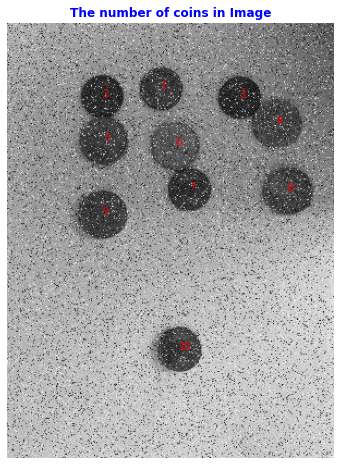

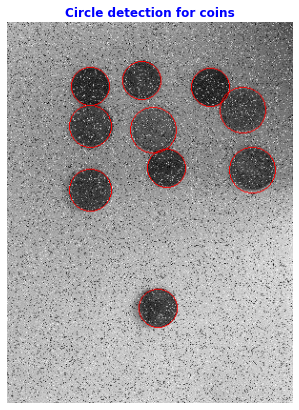

In [21]:

# Your code goes here.
from skimage.measure import label, regionprops


# get regions and calculate the number of coins
regions = regionprops(labels)
print(f"Total coins are: {len(regions)}")
# set figure size 
plt.figure(figsize=(8,8))

# looping throgh regions to get coordinate 
for (i, props) in zip(range(len(regions)), regions):  
    y1, x1 = props.centroid
    plt.text(x1, y1,(i + 1), color ='red')
plt.imshow(im2, cmap ='gray'), plt.title("The number of coins in Image",fontweight="bold", color ='b')
plt.axis('off') 


# Find the coins  
def circel_detection(im):
    image = img_as_ubyte(im)

    # find the edges 
    edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

    # Detect two radii
    hough_radii = np.arange(10, 50, 2)
    hough_res = hough_circle(image = edges, radius= hough_radii)


    # Select the most prominent 10 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=10)

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))

    # im is original image
    image = color.gray2rgb(im)

    # looing through and find coordinate of each coin
    for center_y, center_x, radius in zip(cy, cx, radii):
        circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
        image[circy, circx] = (1, 0, 0)

    x = ax.imshow((image*255).astype(np.uint8), cmap ='gray'), plt.title("Circle detection for coins", fontweight="bold", color ='b')
    plt.axis('off')
    return plt.show()

circel_detection(im2) # 

There are total 5 x 5 cents and 5 x 50 cents.
Total amount of money in the image is: 275 cents and it is 2.75 euro


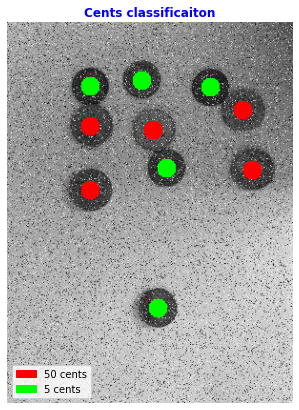

In [22]:
import matplotlib.patches as mpatches
def circel_and_cent_detection(im):
    """
    Parameters
    ----------
     im: round shaped image
     
     
    Returns
    -------
    plt.show(): classified image
    
    
    """
    
    image = img_as_ubyte(im)

    # find the edges 
    edges = feature.canny(image, sigma=3, low_threshold=10, high_threshold=50)

    # Detect two radii
    hough_radii = np.arange(10, 50, 2)
    hough_res = hough_circle(image = edges, radius= hough_radii)


    # Select the most prominent 10 circles
    accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,total_num_peaks=10)

    # Draw them
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 7))

    # orginal image to gray scale image
    image = color.gray2rgb(im)

    
    cents_5 = 0 # counting the 5 cents 
    cents_50 = 0 # counting the 50 cents 
    
    # looping through and classified by radius of the cents, 5 cents has 20 and 50 cents more than 20.

    for center_y, center_x, radius in zip(cy, cx, radii):
        
        if radius <=20:

            rr, cc = draw.disk((center_y, center_x), 10, shape=image.shape)
            image[rr, cc, :] = (0, 1, 0)
            
            cents_5 += 1 
            
        else:
            rr, cc = draw.disk((center_y, center_x), 10, shape=image.shape)
            image[rr, cc, :] = (1, 0, 0)
            
            cents_50 +=1
            
    # plotting the result 
    ax.imshow((image*255).astype(np.uint8)), plt.title("Cents classificaiton", fontweight="bold", color ='b'),plt.axis('off')
    red_patch = mpatches.Patch(color='red', label='50 cents')
    green_patch = mpatches.Patch(color='lime', label='5 cents' )
    ax.legend(handles=[red_patch, green_patch], loc='lower left')
    
    # calculating the amount of money
    print(f"There are total {cents_5} x 5 cents and {cents_50} x 50 cents.")
    print(f"Total amount of money in the image is:", (cents_5*5 + cents_50*50), "cents", "and it is", (cents_5*5 + cents_50*50)/100, "euro"  )
    
    return plt.show()

# calling the function with im2(im2 is  orginal nosy image)
circel_and_cent_detection(im2)